In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Display the measurement row's columns and data in dictionary format
measure_row = session.query(Measurement).first()
#measure_row.__dict__

#Step 1: Get the latest date

Latest_date = engine.execute("SELECT MAX(date) FROM Measurement").fetchall()
print(Latest_date)

[('2017-08-23',)]


In [12]:
# Display the station row's columns and data in dictionary format
station_row = session.query(Measurement).first()
station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xafe3588>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [13]:
# Display the station row's columns and data in dictionary format
station_row = session.query(Station).first()
station_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xaff1208>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

prcp_qry = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-22').all()
prcp_plot_pd = pd.DataFrame(data=prcp_qry, columns=["date", "prcp"])
prcp_plot_pd = prcp_plot_pd.set_index('date', drop=True)
prcp_plot_pd.head()

,prcp
date,
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00


![precipitation](Images/precipitation.png)

In [ ]:
# Calculate the date 1 year ago from the last data point in the database

In [15]:
# Perform a query to retrieve the data and precipitation scores
#Create variables to use in our data plot
prcp = prcp_plot_pd['prcp']
date = prcp_plot_pd.index.values
#date
prcp

date
2016-08-22    0.40
2016-08-23    0.00
2016-08-24    0.08
2016-08-25    0.08
2016-08-26    0.00
2016-08-27    0.00
2016-08-28    0.01
2016-08-29    0.00
2016-08-30    0.00
2016-08-31    0.13
2016-09-01    0.00
2016-09-02    0.00
2016-09-03    0.00
2016-09-04    0.03
2016-09-05     NaN
2016-09-06     NaN
2016-09-07    0.05
2016-09-08    0.00
2016-09-09    0.03
2016-09-10    0.00
2016-09-11    0.05
2016-09-12    0.00
2016-09-13    0.02
2016-09-14    1.32
2016-09-15    0.42
2016-09-16    0.06
2016-09-17    0.05
2016-09-18    0.00
2016-09-19    0.00
2016-09-20    0.00
              ... 
2017-07-24    0.84
2017-07-25    0.30
2017-07-26    0.30
2017-07-27    0.00
2017-07-28    0.40
2017-07-29    0.30
2017-07-30    0.30
2017-07-31    0.00
2017-08-01     NaN
2017-08-02    0.25
2017-08-03    0.06
2017-08-05     NaN
2017-08-06     NaN
2017-08-07    0.05
2017-08-08    0.34
2017-08-09    0.15
2017-08-10    0.07
2017-08-11     NaN
2017-08-12    0.14
2017-08-13     NaN
2017-08-14    0.22
2017-08

<Figure size 432x288 with 0 Axes>

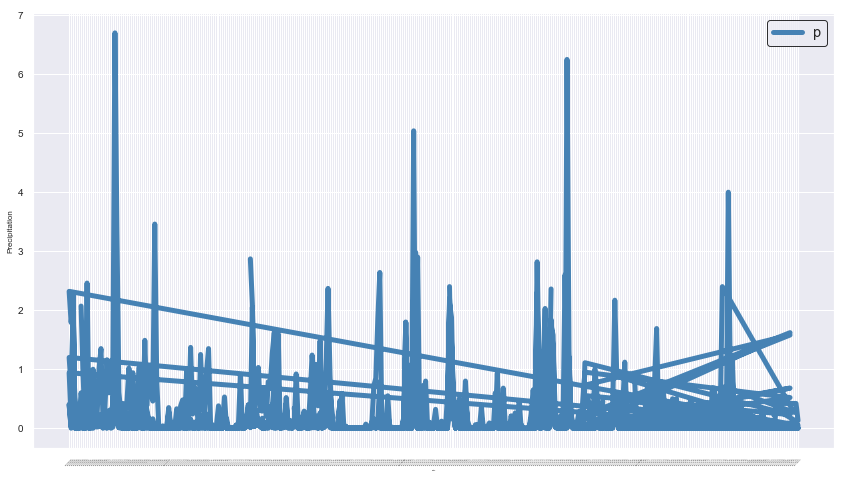

In [19]:
# Create the plot
sns.set()
plt.clf()
plt.figure(figsize=[12.8, 8])
labels = 'precipitation'
x_axis = date
y_axis = prcp
plt.xlabel("Date", fontsize=2)
plt.ylabel("Precipitation", fontsize=8)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=2, rotation=45)

# Have to plot our chart once again as it doesn't stick after being shown
prcp_plot = plt.plot(x_axis, y_axis, color='steelblue', linewidth=5)
plt.legend(labels=labels, loc='upper right', fontsize='large', frameon=True, edgecolor='black')
plt.show()

In [ ]:
# Save the query results as a Pandas DataFrame and set the index to the date column


In [ ]:
# Sort the dataframe by date

In [ ]:
# Use Pandas Plotting with Matplotlib to plot the data

In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_plot_pd.describe()

,prcp
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [12]:
# Design a query to show how many stations are available in this dataset?


[(9)]

In [62]:
# Design a query to show how many stations are available in this dataset?
stn_cnt_qry = session.query(Station.station).count()
stn_cnt_qry

9

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stns = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())
active_stns.all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_act_stn = session.query(Measurement.station,  min(Measurement.tobs).\ 
                             filter(Measurement.station=="USC00519281").all()
most_act_stn  

SyntaxError: unexpected character after line continuation character (<ipython-input-89-4f1196ee3d25>, line 3)

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [73]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

stn_12mths = session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-08-23').filter(Measurement.date >= '2016-08-22').\
    filter(Measurement.station=="USC00519281").all()
stn_12mths

[('USC00519281', '2016-08-22', 78.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC005192

In [74]:
#Put data into dataframe to be plotted as histogram
history_pd = pd.DataFrame(data=stn_12mths, columns=["station", "date", "tobs"])
history_pd = history_pd.set_index('date', drop=True)
history_pd = history_pd.drop(columns="station", axis=1)
history_pd.head()

,tobs
date,
2016-08-22,78.0
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0


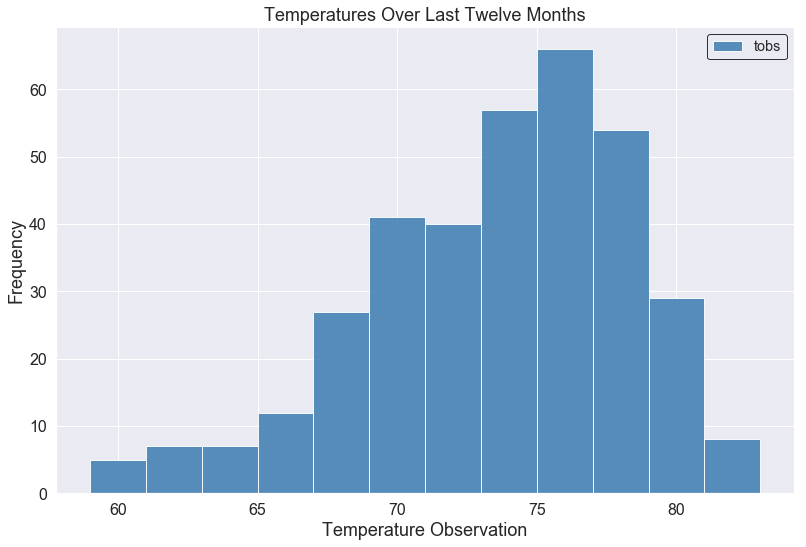

In [80]:
sns.set()
#Plot the results as a histogram with bins of 12
x = history_pd['tobs']
num_bins = 12
# the histogram of the data
#n, bins, patches = 
plt.figure(figsize=[12.8, 8])
temp_plot = plt.hist(x, num_bins, facecolor='steelblue', label='tobs', alpha=0.9)

plt.xlabel('Temperature Observation', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Temperatures Over Last Twelve Months', fontsize=18)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='large')


plt.subplots_adjust(left=0.15)
plt.show()

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [95]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
print(calc_temps("2016-08-05", "2016-08-20"))


None


<IPython.core.display.Javascript object>


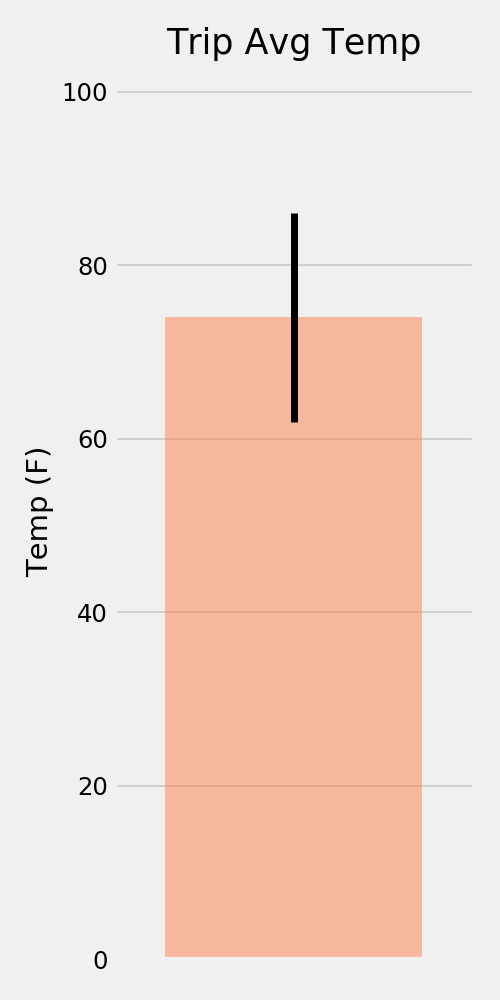

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment